**Student Information, Name: Mohammed Sohail Ahmed, 
Student Id: 2358074,

Email Id: moha0748@mylaurie*a
**

# Assignment 2

In [1]:
import warnings

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from tensorflow import keras

from sklearn.svm import SVC, LinearSVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
warnings.filterwarnings("ignore")

# 1 Concept Question

## 1.1 Support Vector Machines: 3 points

### 1. How large can h ≥ 0 be so the training examples are still linearly separable?

In [58]:
clf = SVC(kernel="linear", C=1e6)

margin_list = [-1, -1, -1, -1]

In [59]:
def plot_svm(h):
    X = np.array([[0, 0], [2, 2], [h, 1], [0, 3]])
    y = np.array([1, 1, -1, -1])

    clf.fit(X, y)
    
    margin_list[h] = 1 / np.linalg.norm(clf.coef_)
    
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="bwr")
    plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidths=1, facecolors="none", edgecolors="k")

    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = clf.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors="k", levels=[-1, 0, 1], alpha=0.5, linestyles=["--", "-", "--"])
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.title(f"SVM with h = {h}")

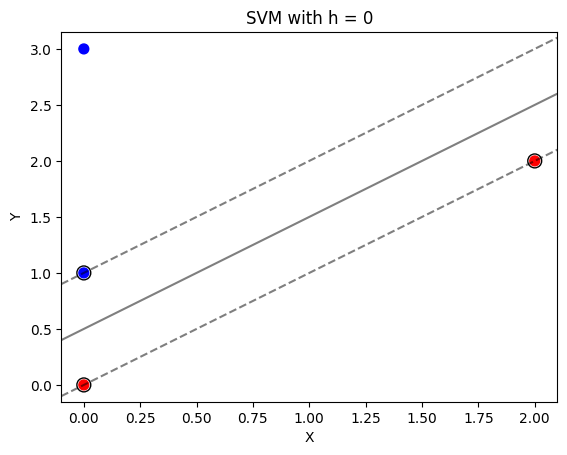

In [60]:
plot_svm(0)

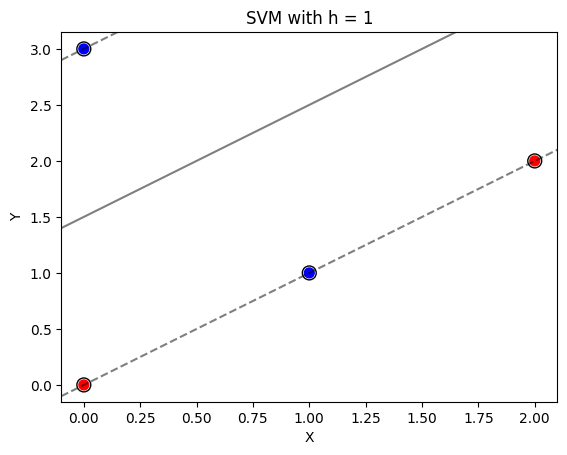

In [61]:
plot_svm(1)

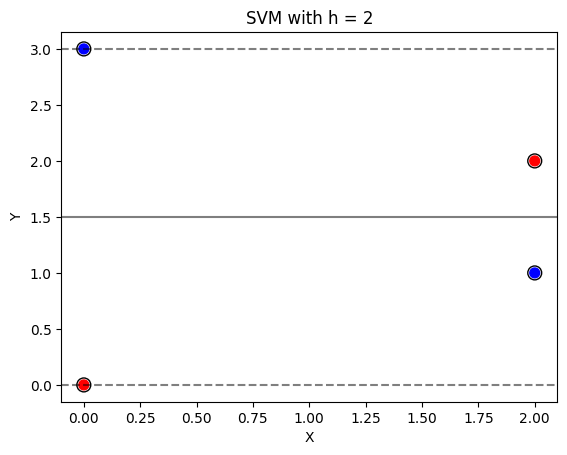

In [62]:
plot_svm(2)

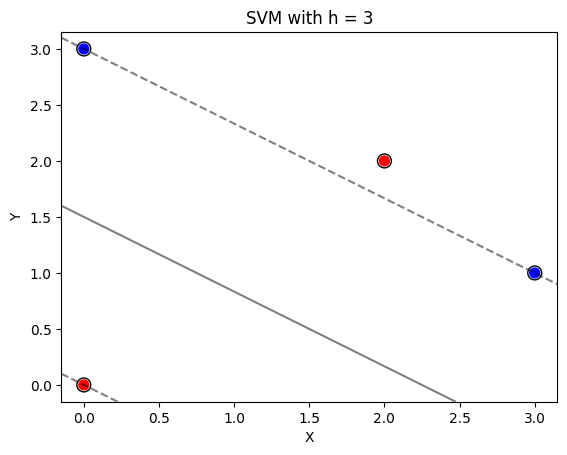

In [63]:
plot_svm(3)

**The maximum "h" can have so that the training example sare still linearly separable is "0" (i.e: h = 0)**

### 2. Will the direction of the maximum margin decision boundary change as a function of h when the samples are separable? Explain your answer with one sentence.

**No, the direction of the maximum margin decision boundary dosen't changes. Because it is calculated according to the position of x1, x2 and x4 in our case which are not a function of h.**

### 3. What will be the margin obtained by the maximum margin boundary as a function of h? Note that the margin as a function of h is actually a linear function.

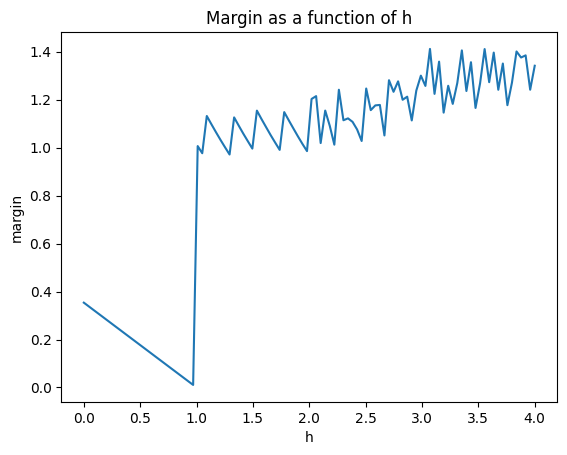

In [69]:
h_range = np.linspace(0, 4, 100)
margin_list = []

for h in h_range:
    X = np.array([[0, 0], [2, 2], [h, 1], [0, 3]])
    y = np.array([1, 1, -1, -1])
    clf = SVC(kernel='linear', C=1e6) # Use a large C value to enforce hard margin
    clf.fit(X, y)
    margin = 1 / np.linalg.norm(clf.coef_)
    margin_list.append(margin)

plt.plot(h_range, margin_list)
plt.xlabel('h')
plt.ylabel('margin')
plt.title('Margin as a function of h')
plt.show()

In [66]:
print(f"The margin obtained by the maximum margin boundary as a function of h is when h = 1")

The margin obtained by the maximum margin boundary as a function of h is when h = 1


## 1.2 Neural Nets: 2 points

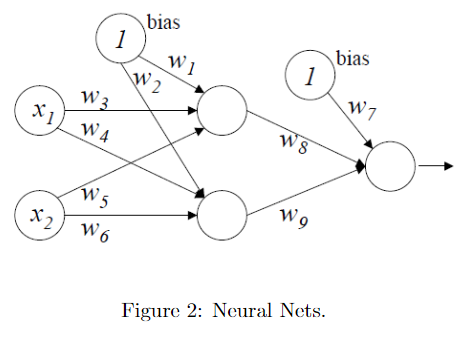

### 1. What is the output P (y = 1|x, w) from the above neural net? Express it in terms of xi, c and weights wi.

Calculate the input to the hidden layer:
            z1 = w * 1x1 + w * 2x2
            z2 =  * w3x1 +  * w4x2
            z3 = *  w5x1 + *  w6
    Apply the linear activation function to the hidden layer:
        h * 1 = cz1
         * h2 = cz2
          h3 
        Calculate the input to the output unit:
      *    z =  * w7h1 +  w 8h2

        Apply the sigmoid activation function to the output unit:
        P(y = 1|x, w) = g(z) = 1 / (1 + e^(-z))^(-z))

### 2. Is it true that any multi-layered neural net with linear activation functions at hidden layers can be represented as a neural net without any hidden layer? Briefly explain your answer.

**Yes, it is true that any multi-layered neural net with activation functions at hidden layers can be represented as a neural net without any hidden layer. When we look at the lienar activation function, it is simply a function in the form of h(z)  = c * z, where c is a constant. This emans that the output of a linear activation function is proportional to it's input. If we have multiple layers of linear activation functions, we can simplify them by multiplying the weights of each layer and adding the biases of each layer.**

## 1.3 Bayesian Rules and Bayesian Networks: 3 points

### 1. Consider the Bayesian network shown in Figure 3. All the variables are boolean. Write the expression for the joint likelihood of the network in its factored form (1 points).

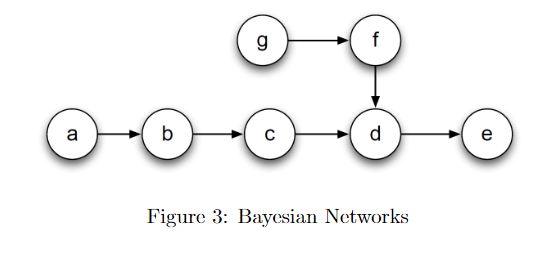

**The expression for the joint likelihood of the network is: P(A) * P(B|A) * P(C|B) * P(D|C, F) * P(E|D) * P(F|G) * P(G)**

### 2. Suppose you are given the following set of data shown in Figure 4 with three Boolean input variables a, b, and c, and a single Boolean output variable K. Assume we are using a Naive Bayesian classifier to predict the value of K from the values of the other variables. What is P (K = 1|a = 1, b = 1, c = 0), and P (K = 0|a = 1, b = 1)? (2 points)

**For the P (K = 1|a = 1, b = 1, c = 0) is: 0.5**

**Fromula: P(K=1|a=1, b=1, c=0)=P(K=1, a=1, b=1, c=0)/P(a=1, b=1, c=0) =P(K=1) * P(a=1|K=1) * P(b=1|K=1) * P(c=0|K=1)/ P(a=1, b=1, c=0, K=1) + P(a=1, b=1, c=0, K=0)**

**For the P (K = 0|a = 1, b = 1) is: 0.66**

**Fromula: P(K=0|a=1, b=1)=P(K=0, a=1, b=1) / P(a=1, b=1) =P(K=0) * P(a=1|K=0) * P(b=1|K=0) / P(a=1, b=1, K=1) + P(a=1, b=1, K=0)**

# 2 Product Classification

## 2.1 Data Loading and Preprocessing: 1 points

In [20]:
otto_data = pd.read_csv("otto.csv")

In [21]:
otto_data.head()

,id,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,2,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,3,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,4,1,0,0,1,6,1,5,0,0,...,0,1,2,0,0,0,0,0,0,Class_1
4,5,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1


In [22]:
X = otto_data.drop(["id", "target"], axis=1)
y = otto_data["target"]

In [23]:
otto_scalar = StandardScaler()
X = otto_scalar.fit_transform(X)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
X_train.shape, X_test.shape

((43314, 93), (18564, 93))

In [26]:
y_train.shape, y_test.shape

((43314,), (18564,))

## 2.2 Classifier Construction and Evaluation: 4 points

### 1. Logestic Regression

In [28]:
otto_lg = LogisticRegression(penalty="l2", C=1, solver="lbfgs")

In [29]:
otto_lg.fit(X_train, y_train)

LogisticRegression(C=1)

In [30]:
y_pred_lg = otto_lg.predict(X_test)

In [31]:
y_pred_lg

array(['Class_2', 'Class_7', 'Class_6', ..., 'Class_3', 'Class_9',
       'Class_6'], dtype=object)

### 2. Neural Network (Multi Layer Perceptron)

In [32]:
otto_mlp = MLPClassifier(hidden_layer_sizes=(100, ), activation="relu", solver="adam")

In [33]:
otto_mlp.fit(X_train, y_train)

MLPClassifier()

In [34]:
y_pred_mlp = otto_mlp.predict(X_test)

In [35]:
y_pred_mlp

array(['Class_7', 'Class_7', 'Class_6', ..., 'Class_3', 'Class_9',
       'Class_1'], dtype='<U7')

### 3. Naive Bayes

In [36]:
otto_gnb = GaussianNB()

In [37]:
otto_gnb.fit(X_train, y_train)

GaussianNB()

In [38]:
y_pred_gnb = otto_gnb.predict(X_test)

In [39]:
y_pred_gnb

array(['Class_5', 'Class_3', 'Class_6', ..., 'Class_3', 'Class_9',
       'Class_6'], dtype='<U7')

### 4. Linear SVM

In [40]:
otto_svc = LinearSVC(penalty="l2", C=1, loss="squared_hinge")

In [41]:
otto_svc.fit(X_train, y_train)

LinearSVC(C=1)

In [42]:
y_pred_svc = otto_svc.predict(X_test)

In [43]:
y_pred_svc

array(['Class_2', 'Class_7', 'Class_6', ..., 'Class_2', 'Class_9',
       'Class_6'], dtype=object)

## 2.3 Performance Comparison: 1 points

In [44]:
f1_lg = f1_score(y_test, y_pred_lg, average="micro")

print(f"The F1 score for Logestic Regression is: {f1_lg}")

The F1 score for Logestic Regression is: 0.7631437190260719


In [45]:
f1_mlp = f1_score(y_test, y_pred_mlp, average="micro")

print(f"The F1 score for Neural Network (Multi Layer Perceptron) is: {f1_mlp}")

The F1 score for Neural Network (Multi Layer Perceptron) is: 0.7884076707606119


In [46]:
f1_gnb = f1_score(y_test, y_pred_gnb, average="micro")

print(f"The F1 score for Naive Bayes is: {f1_gnb}")

The F1 score for Naive Bayes is: 0.6134453781512605


In [47]:
f1_svc = f1_score(y_test, y_pred_svc, average="micro")

print(f"The F1 score for Linear SVM is: {f1_svc}")

The F1 score for Linear SVM is: 0.75


**From the above "f1" score, it is clear that "Neural Network (Multi Layer Perceptron)" is better when compared with others. The "f1" score is: 0.7884076707606119**

# 3 COVID Diagnosis

## 1. Image pre-processing (2 points)

In [48]:
train_data_generator = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

test_data_generator = ImageDataGenerator(rescale=1./255)

train_generator = train_data_generator.flow_from_directory("./xray_dataset_covid19/xray_dataset_covid19/train", target_size=(150, 150), batch_size=32, class_mode="binary")

validation_generator = test_data_generator.flow_from_directory("./xray_dataset_covid19/xray_dataset_covid19/test", target_size=(150, 150), batch_size=32, class_mode="binary")

Found 148 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


## 2. Model building (3 points)

In [53]:
model = Sequential() 

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) 
model.add(Dense(256, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 74, 74, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 17, 17, 128)      

In [54]:
early_stop = EarlyStopping(patience=6)
trained_model = model.fit(train_generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
5/5 [==============================] - 16s 3s/step - loss: 0.9728 - accuracy: 0.4865 - val_loss: 0.7366 - val_accuracy: 0.5000
Epoch 2/20
5/5 [==============================] - 13s 3s/step - loss: 0.7207 - accuracy: 0.4662 - val_loss: 0.6680 - val_accuracy: 0.5000
Epoch 3/20
5/5 [==============================] - 13s 2s/step - loss: 0.6827 - accuracy: 0.5405 - val_loss: 0.6507 - val_accuracy: 0.5000
Epoch 4/20
5/5 [==============================] - 13s 3s/step - loss: 0.6886 - accuracy: 0.5338 - val_loss: 0.6183 - val_accuracy: 0.9250
Epoch 5/20
5/5 [==============================] - 13s 2s/step - loss: 0.6545 - accuracy: 0.6554 - val_loss: 0.5306 - val_accuracy: 0.9750
Epoch 6/20
5/5 [==============================] - 14s 3s/step - loss: 0.6204 - accuracy: 0.6757 - val_loss: 0.3775 - val_accuracy: 1.0000
Epoch 7/20
5/5 [==============================] - 13s 3s/step - loss: 0.6227 - accuracy: 0.7095 - val_loss: 0.2296 - val_accuracy: 0.9750
Epoch 8/20
5/5 [==================

## 3. Model evaluation (3 points)

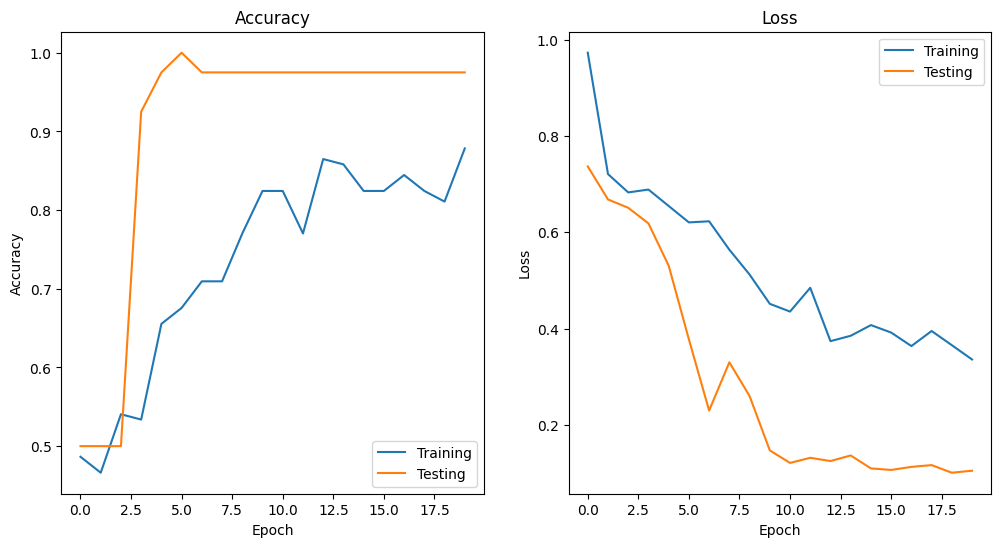

In [55]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(trained_model.history['accuracy'], label='Training')
plt.plot(trained_model.history['val_accuracy'], label='Testing')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(trained_model.history['loss'], label='Training')
plt.plot(trained_model.history['val_loss'], label='Testing')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()